In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muisne
Processing Record 2 of Set 1 | folldal
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | buta
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | novopavlovka
Processing Record 9 of Set 1 | teodoro sampaio
Processing Record 10 of Set 1 | cayenne
Processing Record 11 of Set 1 | omutinskoye
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | tazovskiy
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | samusu
City not found. Skipping...
Processing Record 21 of Set 1 | baruun-urt
Processing

Processing Record 37 of Set 4 | ossora
Processing Record 38 of Set 4 | juneau
Processing Record 39 of Set 4 | saskylakh
Processing Record 40 of Set 4 | katesh
Processing Record 41 of Set 4 | amderma
City not found. Skipping...
Processing Record 42 of Set 4 | morro bay
Processing Record 43 of Set 4 | orangeburg
Processing Record 44 of Set 4 | lata
Processing Record 45 of Set 4 | draguignan
Processing Record 46 of Set 4 | prien
Processing Record 47 of Set 4 | juterbog
Processing Record 48 of Set 4 | sanmenxia
Processing Record 49 of Set 4 | cockburn town
Processing Record 50 of Set 4 | saldanha
Processing Record 1 of Set 5 | ribeira grande
Processing Record 2 of Set 5 | avarua
Processing Record 3 of Set 5 | haines junction
Processing Record 4 of Set 5 | nea mesimvria
Processing Record 5 of Set 5 | coahuayana
Processing Record 6 of Set 5 | itarema
Processing Record 7 of Set 5 | solsvik
City not found. Skipping...
Processing Record 8 of Set 5 | mar del plata
Processing Record 9 of Set 5 | 

Processing Record 28 of Set 8 | vanavara
Processing Record 29 of Set 8 | verkhnevilyuysk
Processing Record 30 of Set 8 | mahajanga
Processing Record 31 of Set 8 | yinchuan
Processing Record 32 of Set 8 | campbell river
Processing Record 33 of Set 8 | torres
Processing Record 34 of Set 8 | yellowknife
Processing Record 35 of Set 8 | muroto
Processing Record 36 of Set 8 | norman wells
Processing Record 37 of Set 8 | mirina
City not found. Skipping...
Processing Record 38 of Set 8 | sawtell
Processing Record 39 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 8 | havre-saint-pierre
Processing Record 41 of Set 8 | zhangjiakou
Processing Record 42 of Set 8 | half moon bay
Processing Record 43 of Set 8 | eureka
Processing Record 44 of Set 8 | tual
Processing Record 45 of Set 8 | halalo
City not found. Skipping...
Processing Record 46 of Set 8 | tashtyp
Processing Record 47 of Set 8 | casa nova
Processing Record 48 of Set 8 | bontang
Processing Record 49 of Set 8 | 

Processing Record 17 of Set 12 | shitanjing
Processing Record 18 of Set 12 | dongying
Processing Record 19 of Set 12 | camacha
Processing Record 20 of Set 12 | serov
Processing Record 21 of Set 12 | poum
Processing Record 22 of Set 12 | saint-pierre
Processing Record 23 of Set 12 | yantal
Processing Record 24 of Set 12 | vangaindrano
Processing Record 25 of Set 12 | husavik
Processing Record 26 of Set 12 | boyolangu
Processing Record 27 of Set 12 | kavaratti
Processing Record 28 of Set 12 | ilinge
Processing Record 29 of Set 12 | praia da vitoria
Processing Record 30 of Set 12 | padilla
Processing Record 31 of Set 12 | houma
Processing Record 32 of Set 12 | kyaukse
Processing Record 33 of Set 12 | martinsburg
Processing Record 34 of Set 12 | vao
Processing Record 35 of Set 12 | caravelas
Processing Record 36 of Set 12 | shwebo
Processing Record 37 of Set 12 | serenje
Processing Record 38 of Set 12 | sakaiminato
Processing Record 39 of Set 12 | hammerfest
Processing Record 40 of Set 12 

In [7]:
len(city_data)

580

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muisne,0.6000,-80.0333,80.71,79,99,11.30,EC,2021-10-04 15:21:36
1,Folldal,62.1325,9.9968,47.70,76,31,15.12,NO,2021-10-04 15:21:36
2,New Norfolk,-42.7826,147.0587,49.50,71,20,2.10,AU,2021-10-04 15:21:36
3,Ushuaia,-54.8000,-68.3000,44.22,65,40,27.63,AR,2021-10-04 15:20:06
4,San Patricio,28.0170,-97.5169,84.29,71,98,8.32,US,2021-10-04 15:18:39
5,Buta,2.7858,24.7300,73.85,97,100,0.69,CD,2021-10-04 15:21:37
6,Punta Arenas,-53.1500,-70.9167,46.51,57,40,28.77,CL,2021-10-04 15:18:18
7,Novopavlovka,51.2172,109.2091,28.45,87,19,1.32,RU,2021-10-04 15:21:37
8,Teodoro Sampaio,-22.5325,-52.1675,79.99,71,100,6.20,BR,2021-10-04 15:21:37
9,Cayenne,4.9333,-52.3333,89.64,71,75,5.01,GF,2021-10-04 15:21:38


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muisne,EC,2021-10-04 15:21:36,0.6000,-80.0333,80.71,79,99,11.30
1,Folldal,NO,2021-10-04 15:21:36,62.1325,9.9968,47.70,76,31,15.12
2,New Norfolk,AU,2021-10-04 15:21:36,-42.7826,147.0587,49.50,71,20,2.10
3,Ushuaia,AR,2021-10-04 15:20:06,-54.8000,-68.3000,44.22,65,40,27.63
4,San Patricio,US,2021-10-04 15:18:39,28.0170,-97.5169,84.29,71,98,8.32
5,Buta,CD,2021-10-04 15:21:37,2.7858,24.7300,73.85,97,100,0.69
6,Punta Arenas,CL,2021-10-04 15:18:18,-53.1500,-70.9167,46.51,57,40,28.77
7,Novopavlovka,RU,2021-10-04 15:21:37,51.2172,109.2091,28.45,87,19,1.32
8,Teodoro Sampaio,BR,2021-10-04 15:21:37,-22.5325,-52.1675,79.99,71,100,6.20
9,Cayenne,GF,2021-10-04 15:21:38,4.9333,-52.3333,89.64,71,75,5.01


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

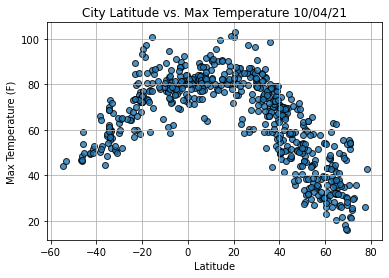

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

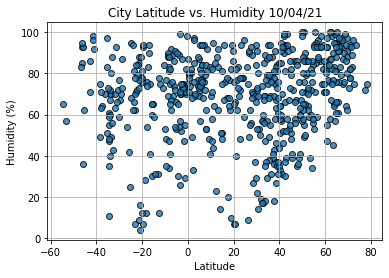

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

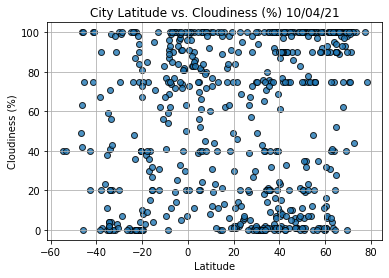

In [14]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

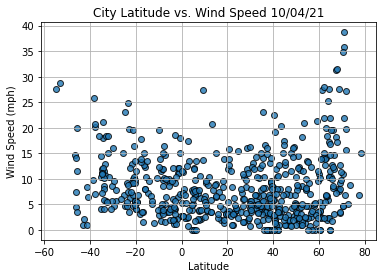

In [15]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

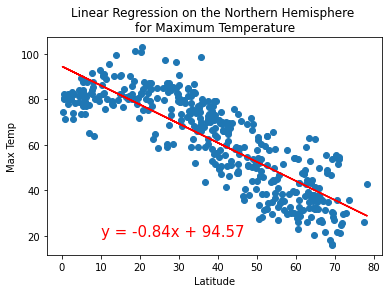

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature',
                       'Max Temp', (10,20))

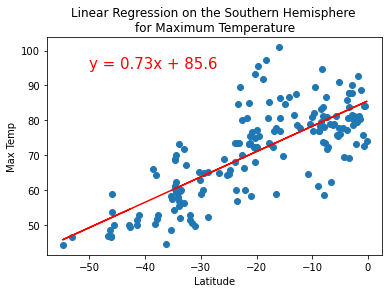

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',
                       'Max Temp', (-50,95))

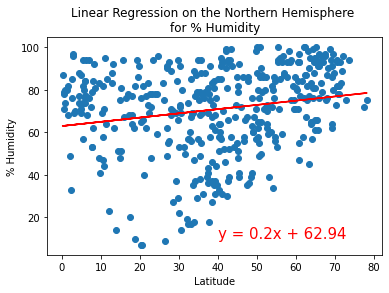

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor % Humidity',
                       '% Humidity', (40,10))

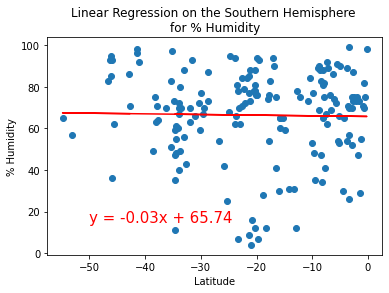

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor % Humidity',
                       '% Humidity', (-50,15))

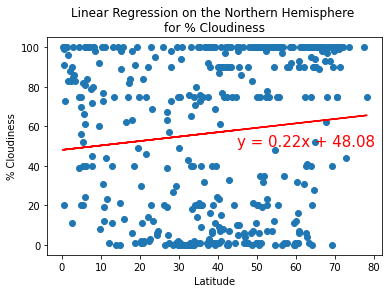

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness', (45,50))

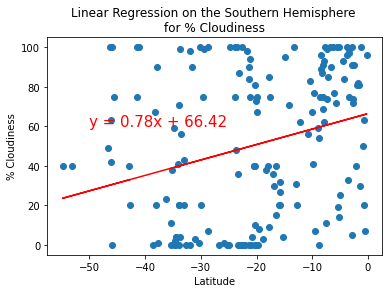

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor % Cloudiness',
                       '% Cloudiness', (-50,60))

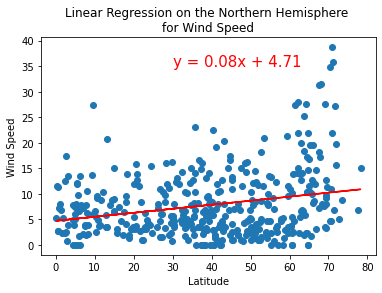

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \nfor Wind Speed',
                       'Wind Speed', (30,35))

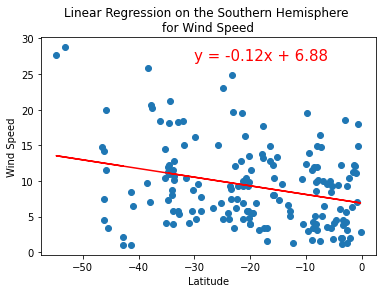

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \nfor Wind Speed',
                       'Wind Speed', (-30,27))